In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Generate some synthetic data
X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize the Random Forest Classifier
# You can tune parameters like n_estimators (number of trees), max_depth, etc.
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the Random Forest Classifier: {accuracy:.2f}")

Accuracy of the Random Forest Classifier: 0.93


In [3]:
import numpy as np

# Define the file path for saving predictions
output_file_path = '/content/random_forest_predictions.csv'

# Save the predictions to a CSV file
# The delimiter is a comma for CSV format
# You might want to add a header if you have column names
np.savetxt(output_file_path, y_pred, delimiter=',', fmt='%d')

print(f"Model predictions saved to '{output_file_path}'")

Model predictions saved to '/content/random_forest_predictions.csv'


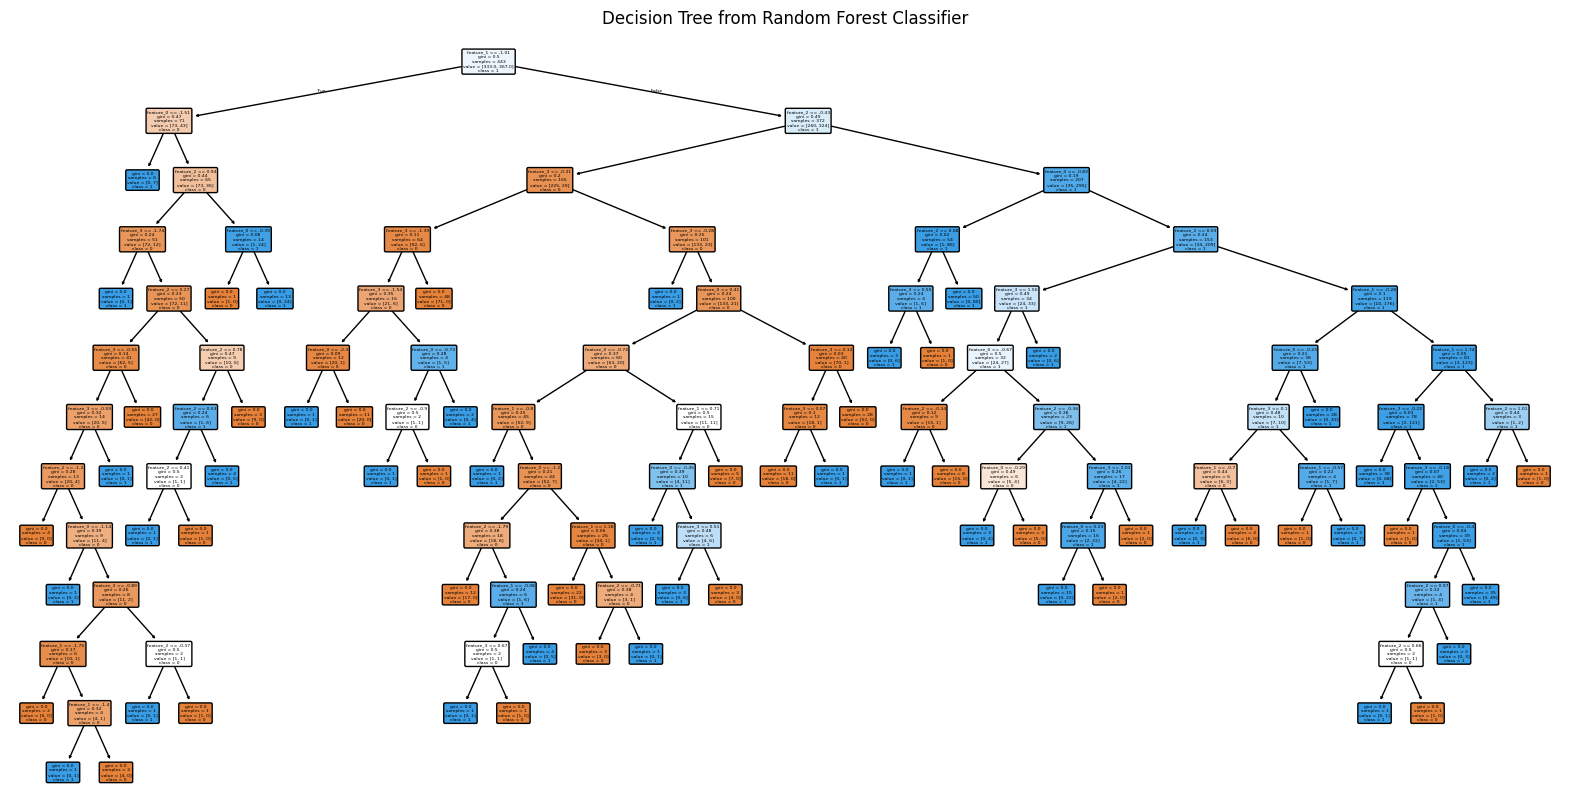

In [6]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Extract a single decision tree from the Random Forest
# Random forests are ensembles of decision trees. We can pick any one.
single_tree = rf_classifier.estimators_[0]

# Define feature names and class names for better readability of the plot
feature_names = [f'feature_{i}' for i in range(X.shape[1])]
class_names = [str(c) for c in rf_classifier.classes_]

plt.figure(figsize=(20, 10)) # Adjust figure size for better readability
plot_tree(single_tree,
          feature_names=feature_names,
          class_names=class_names,
          filled=True,
          rounded=True,
          precision=2)
plt.title("Decision Tree from Random Forest Classifier")
plt.show()

In [5]:
# Analyze the distribution of predictions
prediction_distribution = predictions_df[0].value_counts()

print("Distribution of Predictions:")
display(prediction_distribution)

Distribution of Predictions:


,count
0,
0,161
1,139


In [11]:
import pandas as pd

# Define the file path for the .pkl file
pkl_file_path = 'predictions_df.pkl'

# Save the DataFrame to a .pkl file
predictions_df.to_pickle(pkl_file_path)

print(f"DataFrame 'predictions_df' saved to '{pkl_file_path}'")

DataFrame 'predictions_df' saved to 'predictions_df.pkl'


In [4]:
import pandas as pd

# Load the predictions from the CSV file into a pandas DataFrame
predictions_df = pd.read_csv('/content/random_forest_predictions.csv', header=None)

# Display the first 5 rows of the DataFrame
display(predictions_df.head())

,0
0,0
1,0
2,0
3,0
4,1


In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Create a sample DataFrame with categorical features
data = {
    'Color': ['Red', 'Blue', 'Green', 'Red', 'Blue'],
    'Size': ['Small', 'Medium', 'Large', 'Medium', 'Small'],
    'Material': ['Wood', 'Metal', 'Plastic', 'Wood', 'Metal']
}
df_categorical = pd.DataFrame(data)
display("Original DataFrame:", df_categorical)

'Original DataFrame:'

,Color,Size,Material
0,Red,Small,Wood
1,Blue,Medium,Metal
2,Green,Large,Plastic
3,Red,Medium,Wood
4,Blue,Small,Metal


In [10]:
# Using pd.get_dummies for One-Hot Encoding
df_one_hot_encoded = pd.get_dummies(df_categorical, columns=['Color', 'Material'], drop_first=False)
display("DataFrame after One-Hot Encoding (Color and Material):", df_one_hot_encoded)



'DataFrame after One-Hot Encoding (Color and Material):'

,Size,Color_Blue,Color_Green,Color_Red,Material_Metal,Material_Plastic,Material_Wood
0,Small,False,False,True,False,False,True
1,Medium,True,False,False,True,False,False
2,Large,False,True,False,False,True,False
3,Medium,False,False,True,False,False,True
4,Small,True,False,False,True,False,False


### 2. Label Encoding

Label Encoding is suitable for ordinal categorical data (where categories have a meaningful order). For 'Size', we can assume an order.

In [9]:
# Using LabelEncoder for 'Size'
le = LabelEncoder()
df_label_encoded = df_categorical.copy()
df_label_encoded['Size_Encoded'] = le.fit_transform(df_categorical['Size'])

display("Original 'Size' categories:", df_categorical['Size'].unique())
display("Label Encoded 'Size' mapping:", dict(zip(le.classes_, le.transform(le.classes_))))
display("DataFrame after Label Encoding ('Size'):", df_label_encoded)

"Original 'Size' categories:"

array(['Small', 'Medium', 'Large'], dtype=object)

"Label Encoded 'Size' mapping:"

{'Large': np.int64(0), 'Medium': np.int64(1), 'Small': np.int64(2)}

"DataFrame after Label Encoding ('Size'):"

,Color,Size,Material,Size_Encoded
0,Red,Small,Wood,2
1,Blue,Medium,Metal,1
2,Green,Large,Plastic,0
3,Red,Medium,Wood,1
4,Blue,Small,Metal,2
